In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
from maskrcnn_benchmark.config import cfg
from my_depth_predictor import MyDepthDatasetDemo

In [3]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [4]:
config_file = "../output/my_MYDEPTHCOCO_my_rednet/config.yml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [32]:
my_dataset_demo = MyDepthDatasetDemo(
    cfg,
    min_image_size=600,
    confidence_threshold=0.5,
    weight_loading = "../output/my_MYDEPTHCOCO_my_rednet/model_0055000.pth"
)

Loading weight from ../output/my_MYDEPTHCOCO_my_rednet/model_0055000.pth.


In [33]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)

# Dataset info

In [13]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [14]:
def imshow(img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis("off")

In [34]:
# from http://cocodataset.org/#explore?id=345434
image_id = 15

image = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/" + coco_dataset.images[image_id]["file_name"])
image = np.array(image)

depth = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/" + coco_dataset.images[image_id]["file_name"].replace("color","depth"))
depth = np.array(depth)

html = coco_dataset.display_image(image_id, use_url=False)
IPython.display.HTML(html)

Image:
  height: 480
  width: 640
  id: 15
  file_name: 8_color.png
  segmentations (6):
    83:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    84:purple:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    85:red:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    86:green:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    87:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    88:salmon:{'supercategory': 'battery', 'id': 0, 'name': 'battery'}


objectness =  torch.Size([1, 15, 38, 50])
rpn_box_regression =  torch.Size([1, 60, 38, 50])
achors = 
[[BoxList(num_boxes=28500, image_width=800, image_height=600, mode=xyxy)]]
anhcor[0][0][[0]].bbox
tensor([ 616., -264.,  967.,  439.], device='cuda:0')
LOSS FROM RPN = {}
BoxList(num_boxes=5, image_width=640, image_height=480, mode=xyxy)
[1, 2, 5, 5, 5]
Labels =  ['battery', 'camera', 'screw', 'screw', 'screw']


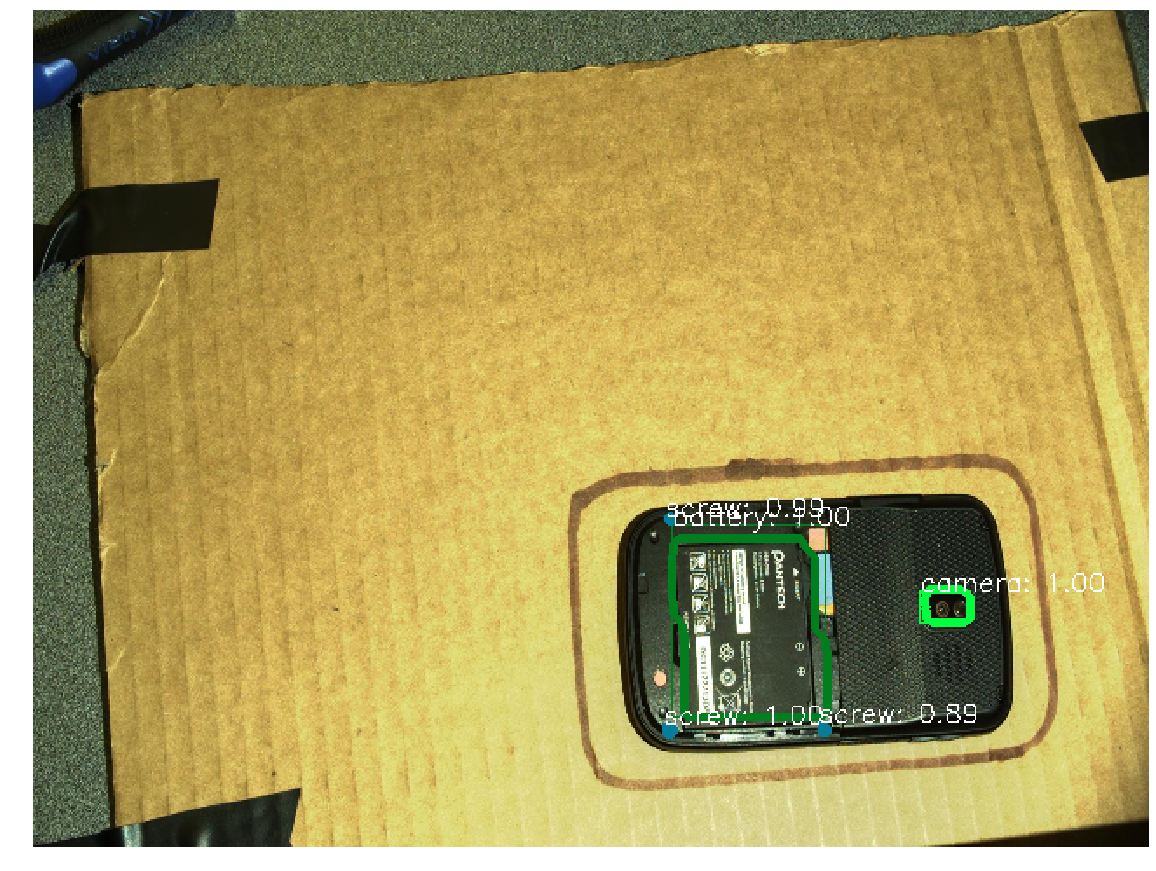

In [35]:
# compute predictions
predictions, r = my_dataset_demo.run_on_opencv_image(image, depth)
# print (predictions.shape)
imshow(predictions)

In [18]:
predictions.shape

(480, 640, 3)

In [14]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)


In [15]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [12]:

for i in [p]:
    print ("Scores =", i.get_field('labels'))
    print ("Scores =", i.get_field('scores'))
    print ("BB = ", i.bbox)

Scores = tensor([4, 2])
Scores = tensor([0.9816, 0.5288])
BB =  tensor([[425.2679, 268.2525, 544.4844, 414.8124],
        [463.0998, 292.2553, 467.6037, 300.6331]])


In [34]:

for i in [p]:
    print ("Scores =", i.get_field('labels'))
    print ("Scores =", i.get_field('scores'))
    print ("BB = ", i.bbox)

Scores = tensor([4])
Scores = tensor([0.9967])
BB =  tensor([[436.5902, 281.4626, 555.9183, 414.8822]])
